In [51]:
#!pip install --upgrade mlxtend 
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import numpy as np

In [52]:
# !wget https://jetson-datathon-sample-data.s3.us-east-2.amazonaws.com/jetson-sample-data.csv '/kaggle/input/jetson-sample-data.csv'

In [53]:
df = pd.read_csv('/kaggle/input/jetson-sample-data/jetson-sample-data.csv')
df

,client_id,order_id,item_name,quantity,price,date
0,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Cosmonaut,1,16.0,2022-01-24
1,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Krombacher,1,8.0,2022-01-24
2,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Ahi Tuna,1,23.0,2022-01-24
3,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Little Gem Salad,1,14.0,2022-01-24
4,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Fire Pie,1,20.0,2022-01-24
...,...,...,...,...,...,...
687906,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3...,HH Etta Rita,1,8.0,2021-11-16
687907,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3...,HH Negroni,1,8.0,2021-11-16
687908,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3...,Rack Roasted Oysters,1,14.0,2021-11-16
687909,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3...,Roasted Branzino,1,45.0,2021-11-16


In [54]:
import csv
df = pd.read_csv('/kaggle/input/jetson-sample-data/jetson-sample-data.csv')
#df.drop('Unnamed: 0', axis =1, inplace = True)
data_apr = df.groupby(['order_id', 'item_name'])[['quantity']].sum().unstack().reset_index().fillna(0) #.set_index('"order_id"')
data_apr.drop(columns=data_apr.columns[0],axis =1, inplace = True)
def num(x):
    if x <= 0:
        return 0
    elif x >=1:
        return 1
data_apr = data_apr.applymap(num)
data_apr
#data_apr.to_csv("apr.csv", quoting=csv.QUOTE_NONE)

quantity                                                \
item_name  Coffeee Cake $10 N/A Bev Package $10 Upcharge $15 Upcharge   
0                     0                   0            0            0   
1                     0                   0            0            0   
2                     0                   0            0            0   
3                     0                   0            0            0   
4                     0                   0            0            0   
...                 ...                 ...          ...          ...   
80512                 0                   0            0            0   
80513                 0                   0            0            0   
80514                 0                   0            0            0   
80515                 0                   0            0            0   
80516                 0                   0            0            0   

                                                                          \
item_name $2 Oysters $2 Upcharge $20 Kids Brunch $25 Plated $25 Upcharge   
0                  0           0               0          0            0   
1                  0           0               0          0            0   
2                  0           0               0          0            0   
3                  0           0               0          0            0   
4                  0           0               0          0            0   
...              ...         ...             ...        ...          ...   
80512              0           0               0          0            0   
80513              0           0               0          0            0   
80514              0           0               0          0            0   
80515              0           0               0          0            0   
80516              0           0               0          0            0   

                               ...                                         \
item_name $3 Centennario Shot  ... how i like my coffee lambrusco risotto   
0                           0  ...                    0                 0   
1                           0  ...                    0                 0   
2                           0  ...                    0                 0   
3                           0  ...                    0                 0   
4                           0  ...                    0                 0   
...                       ...  ...                  ...               ...   
80512                       0  ...                    0                 0   
80513                       0  ...                    0                 0   
80514                       0  ...                    0                 0   
80515                       0  ...                    0                 0   
80516                       0  ...                    0                 0   

                                                                     \
item_name marinated olives pappardelle pig picnic pita rack of lamb   
0                        0           0               0            0   
1                        0           0               0            0   
2                        0           0               0            0   
3                        0           0               0            0   
4                        0           0               0            0   
...                    ...         ...             ...          ...   
80512                    0           0               0            0   
80513                    0           0               0            0   
80514                    0           0               0            0   
80515                    0           0               0            0   
80516                    0           0               0            0   

                                                                        
item_name smash burger summer peppers sunset on damen whole dover sole  
0   

In [55]:
data_apr = data_apr['quantity']
data_apr

item_name,Coffeee Cake,$10 N/A Bev Package,$10 Upcharge,$15 Upcharge,$2 Oysters,$2 Upcharge,$20 Kids Brunch,$25 Plated,$25 Upcharge,$3 Centennario Shot,...,how i like my coffee,lambrusco risotto,marinated olives,pappardelle,pig picnic pita,rack of lamb,smash burger,summer peppers,sunset on damen,whole dover sole
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# min_sup = float(input("Enter  minimum support: "))
# conf = float(input("Enter  minimum confidence: "))
min_sup = 0.02
conf = 0.3

In [57]:
frequent_itemsets = apriori(data_apr, min_support = min_sup, use_colnames = True)
rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = conf)
print("Frequent itemsets are: \n",frequent_itemsets)
print("\nAssociation Rules are: \n", rules[["antecedents","consequents","confidence"]])

/opt/conda/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent itemsets are: 
       support                                           itemsets
0    0.048338                                 (ALL IN ON SAVORY)
1    0.058870                                         (Ahi Tuna)
2    0.024827                                  (Angel Food Cake)
3    0.031012                                           (Aperol)
4    0.042898                                    (Avocado Toast)
..        ...                                                ...
194  0.029348  (Focaccia, Ricotta Pillows, Bucatini Cacio e P...
195  0.031993  (Focaccia, Spicy Meatballs, Bucatini Cacio e P...
196  0.020244   (Focaccia, Wild Mushroom, Bucatini Cacio e Pepe)
197  0.022765   (Spicy Meatballs, Cavatelli Bolognese, Focaccia)
198  0.028156           (Guest Love, Celebration Shot, Focaccia)

[199 rows x 2 columns]

Association Rules are: 
                         antecedents              consequents  confidence
0                (ALL IN ON SAVORY)               (Focaccia)    0.466084

In [58]:
import datetime
today = datetime.datetime.today()
# today = pd.to_datetime(today)
df["date"] = pd.to_datetime(df["date"])

In [59]:
rec_table = df.groupby(["client_id"]).agg({"date": lambda x: ((today - x.max()).days)})
rec_table.columns = ["Recency"]

In [60]:
rec_table.head()

,Recency
client_id,
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--42iGww,594
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--4CPFww,725
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--4a8Aww,300
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--57KGgw,671
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--6PYHAw,456


In [61]:
freq_table = df.drop_duplicates(subset = "order_id").groupby(["client_id"])[["order_id"]].count()
freq_table.columns = ["Frequency"]
freq_table.head()

,Frequency
client_id,
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--42iGww,1
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--4CPFww,1
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--4a8Aww,1
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--57KGgw,1
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--6PYHAw,1


In [62]:
freq_table.value_counts()

Frequency
1            58249
2             5601
3             1481
4              557
5              275
6              123
7               66
8               33
9               23
10              20
11              12
12               8
13               7
18               6
19               5
25               4
15               4
17               3
16               3
20               3
23               2
14               2
22               1
24               1
29               1
38               1
51               1
70               1
dtype: int64

In [63]:
df["Total_Price"] = df["quantity"] * df["price"]
monetary_table = df.groupby(["client_id"])[["Total_Price"]].sum()
monetary_table.columns = ["Monetary"]
monetary_table.head()

,Monetary
client_id,
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--42iGww,57.0
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--4CPFww,160.0
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--4a8Aww,138.0
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--57KGgw,158.0
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--6PYHAw,182.0


In [64]:
rfm_data = pd.concat([rec_table, freq_table, monetary_table], axis = 1)
rfm_data.head()

,Recency,Frequency
client_id,,
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--42iGww,594,1
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--4CPFww,725,1
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--4a8Aww,300,1
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--57KGgw,671,1
ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBi--6PYHAw,456,1


In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

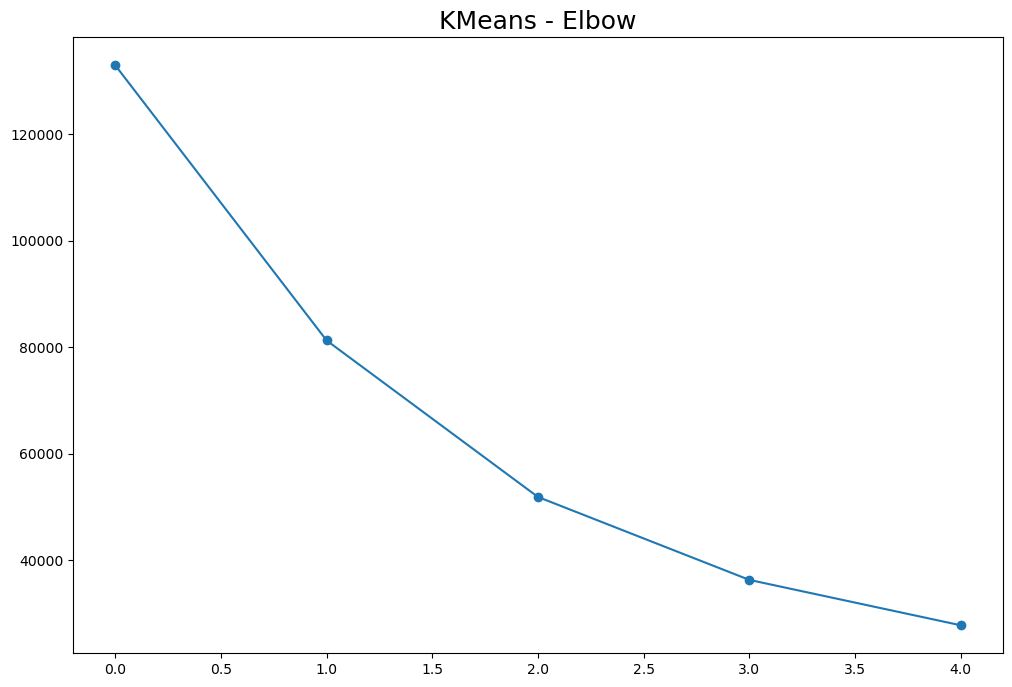

In [66]:
inertia = []
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
for i in np.arange(1,6):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (12,8))    
plt.plot(inertia, marker = "o")
plt.title("KMeans - Elbow", fontsize = 18);

In [67]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(rfm_scaled)
rfm_data["Cluster_No"] = (kmeans.labels_ + 1)

In [68]:
rfm_data.groupby(["Cluster_No"])[["Recency", "Frequency", "Monetary"]].mean()

,Recency,Frequency
Cluster_No,,
1,561.324424,1.062538
2,252.553394,4.196415
3,199.631430,1.112602


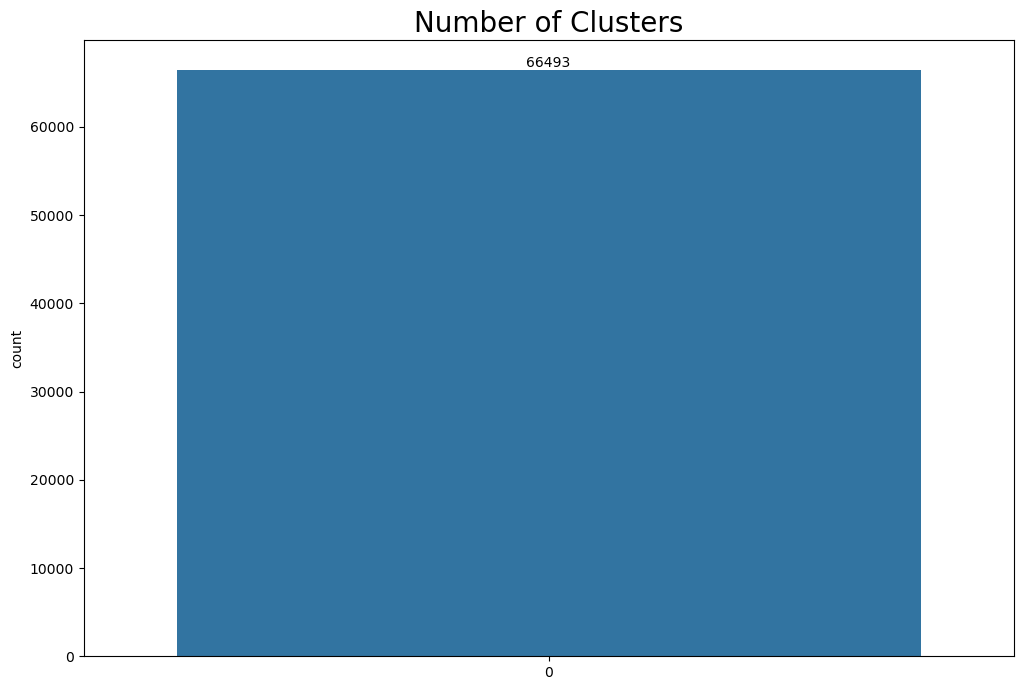

In [69]:
import seaborn as sns
plt.figure(figsize = (12,8))
ax = sns.countplot(rfm_data.Cluster_No)
plt.title("Number of Clusters", fontsize = 20);
for bars in ax.containers:
    ax.bar_label(bars)